In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from algorithms import *
from modules import *

## Functions

In [2]:
def test_functions():
    return {
        "sin": lambda x: np.sin(x) + x**2,
        "log": lambda x: np.log(x),
    }
def solutions():
    return {
        "sin": lambda x: -np.cos(x) + 1/3*x**3,
        "log": lambda x: x*np.log(x) - x,
    }


## QR algorithm

error while $n \rightarrow \infty$

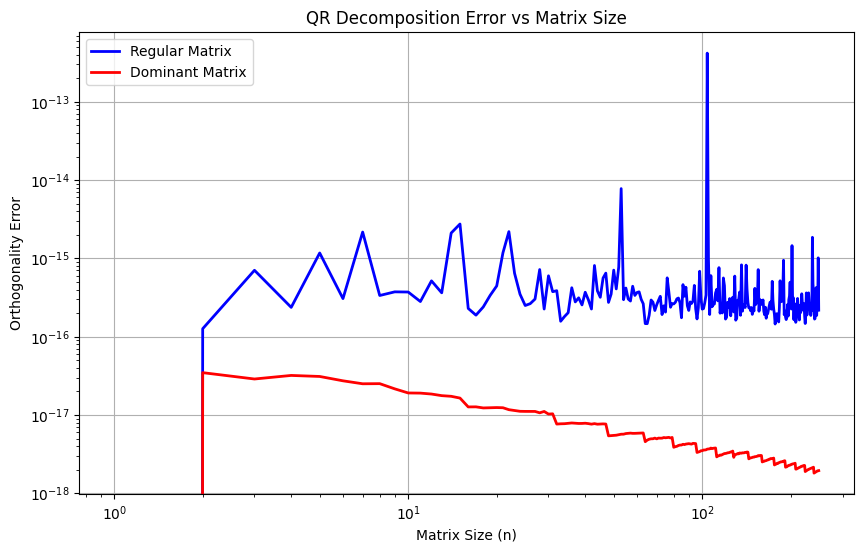

In [30]:
probes = 10
till = 250
ns = range(1, till)

errors = []
for n in ns:
    error = []
    for _ in range(probes):
        A = np.random.rand(n, n)
        error.append(test_orthogonality(A))
    errors.append(np.mean(error))
errors_dominant = []
for n in ns:
    error = []
    for _ in range(probes):
        A = np.random.rand(n, n) + np.eye(n) * n/2 
        error.append(test_orthogonality(A))
    errors_dominant.append(np.mean(error))


plt.figure(figsize=(10, 6))
plt.plot(ns, errors, 'b-', linewidth=2, label='Regular Matrix')
plt.plot(ns, errors_dominant, 'r-', linewidth=2, label='Dominant Matrix')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Orthogonality Error')
plt.title('QR Decomposition Error vs Matrix Size')
plt.legend()
plt.show()

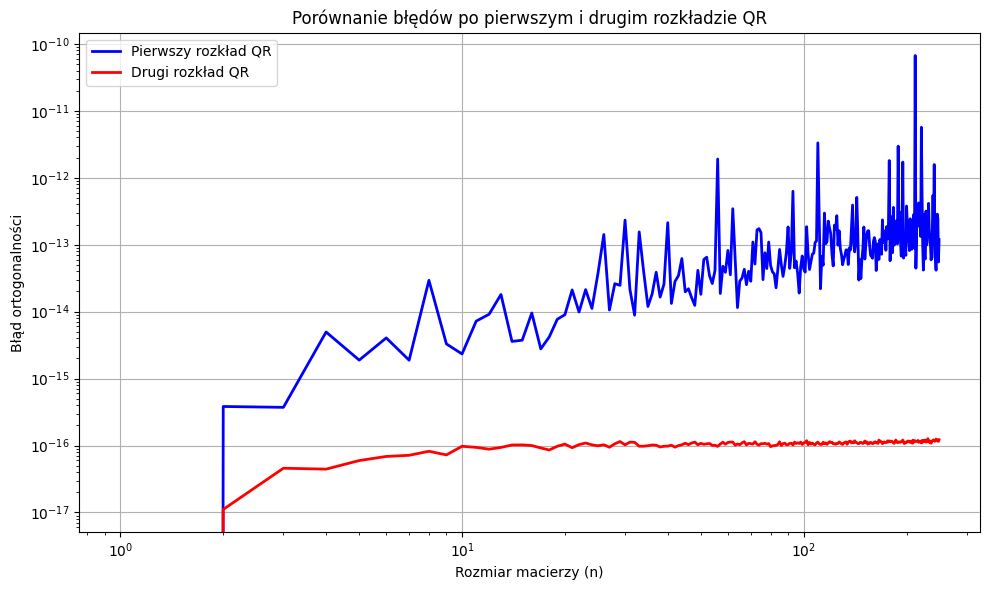

In [3]:
probes = 10
till = 250
ns = range(1, till)

# Regular matrix errors
errors_regular = []
errors_regular_second = []
for n in ns:
    error = []
    error_second = []
    for _ in range(probes):
        A = np.random.rand(n, n)
        # First QR
        Q1 = gram_schmidt([A[:, i] for i in range(n)])
        error.append(test_orthogonality(Q1))
        # Second QR
        Q1 = np.array(Q1).T
        Q2 = gram_schmidt([Q1[:, i] for i in range(n)])
        error_second.append(test_orthogonality(Q2))
    errors_regular.append(np.mean(error))
    errors_regular_second.append(np.mean(error_second))

# Dominant matrix errors
errors_dominant = []
errors_dominant_second = []
for n in ns:
    error = []
    error_second = []
    for _ in range(probes):
        A = np.random.rand(n, n) + np.eye(n) * n/2
        # First QR
        Q1 = gram_schmidt([A[:, i] for i in range(n)])
        error.append(test_orthogonality(Q1))
        # Second QR
        Q1 = np.array(Q1).T
        Q2 = gram_schmidt([Q1[:, i] for i in range(n)])
        error_second.append(test_orthogonality(Q2))
    errors_dominant.append(np.mean(error))
    errors_dominant_second.append(np.mean(error_second))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ns, errors_regular, 'b-', linewidth=2, label='Regular Matrix - First QR')
plt.plot(ns, errors_regular_second, 'b--', linewidth=2, label='Regular Matrix - Second QR')
plt.plot(ns, errors_dominant, 'r-', linewidth=2, label='Dominant Matrix - First QR')
plt.plot(ns, errors_dominant_second, 'r--', linewidth=2, label='Dominant Matrix - Second QR')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Orthogonality Error')
plt.title('QR Decomposition Error Comparison - Single vs Double QR')
plt.legend()
plt.tight_layout()
plt.show()

## Aproximation in unitary spaces 

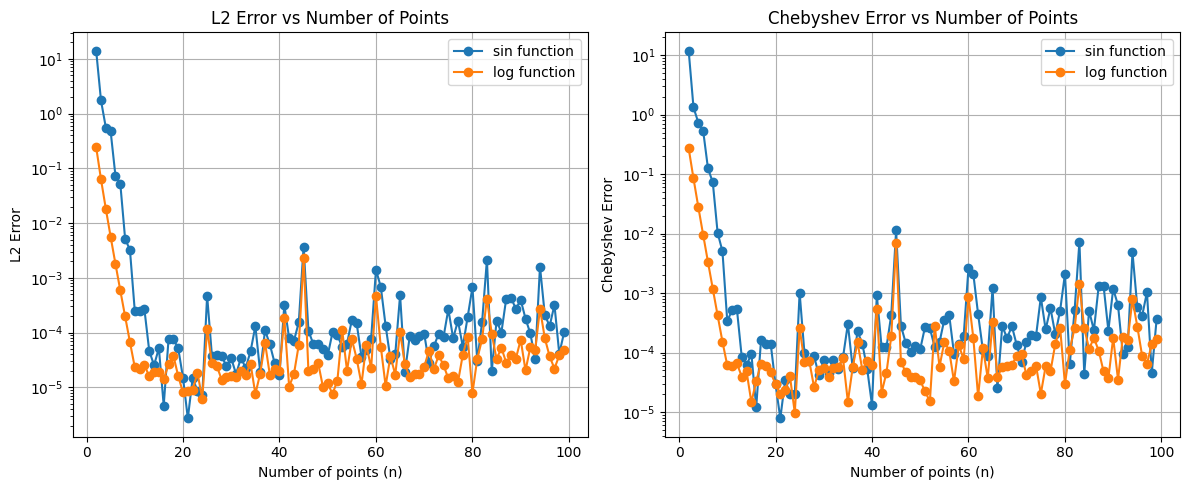

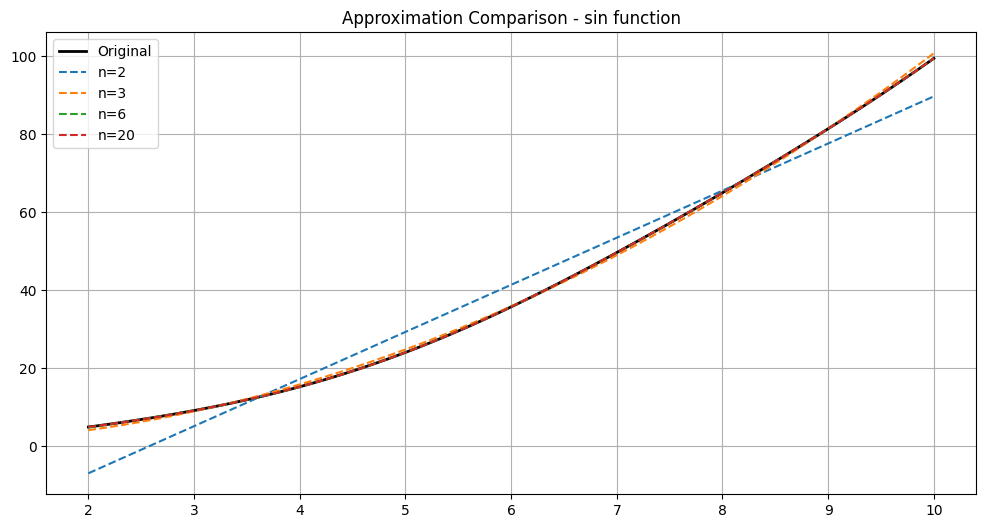

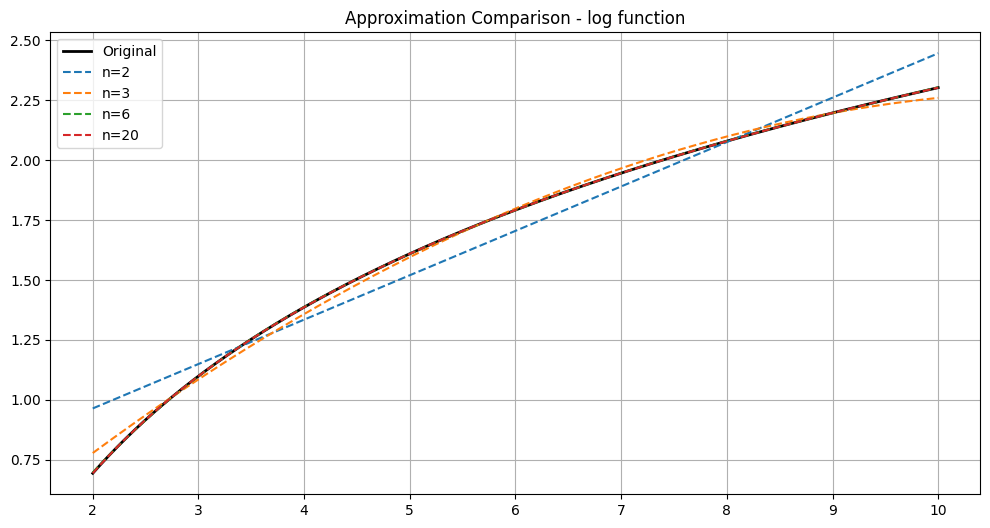

In [28]:
# Get test functions
funcs = test_functions()

# Test parameters
ns = range(2, 100)  # number of interpolation points to test
a, b = 2, 10  # interval

# Calculate errors for both metrics
l2_errors = {name: [] for name in funcs.keys()}
cheb_errors = {name: [] for name in funcs.keys()}

for name, f in funcs.items():
    for n in ns:
        # L2 error
        l2_error = test_approximation_error(f, n, a, b, metric="L2")
        l2_errors[name].append(l2_error)
        
        # Chebyshev error
        cheb_error = test_approximation_error(f, n, a, b, metric="Chebyszew")
        cheb_errors[name].append(cheb_error)

# Plot results
plt.figure(figsize=(12, 5))

# Plot L2 errors
plt.subplot(1, 2, 1)
for name in funcs.keys():
    plt.plot(ns, l2_errors[name], '-o', label=f'{name} function')
plt.yscale('log')
plt.grid(True)
plt.xlabel('Number of points (n)')
plt.ylabel('L2 Error')
plt.title('L2 Error vs Number of Points')
plt.legend()

# Plot Chebyshev errors
plt.subplot(1, 2, 2)
for name in funcs.keys():
    plt.plot(ns, cheb_errors[name], '-o', label=f'{name} function')
plt.yscale('log')
plt.grid(True)
plt.xlabel('Number of points (n)')
plt.ylabel('Chebyshev Error')
plt.title('Chebyshev Error vs Number of Points')
plt.legend()

plt.tight_layout()
plt.show()

# Plot function approximations for visual comparison
for name, f in funcs.items():
    plot_approximation_comparison(f, [2, 3, 6, 20], a, b, 
                                title=f'Approximation Comparison - {name} function')

## Coefficents of squaring, of higher order 

error vs points  

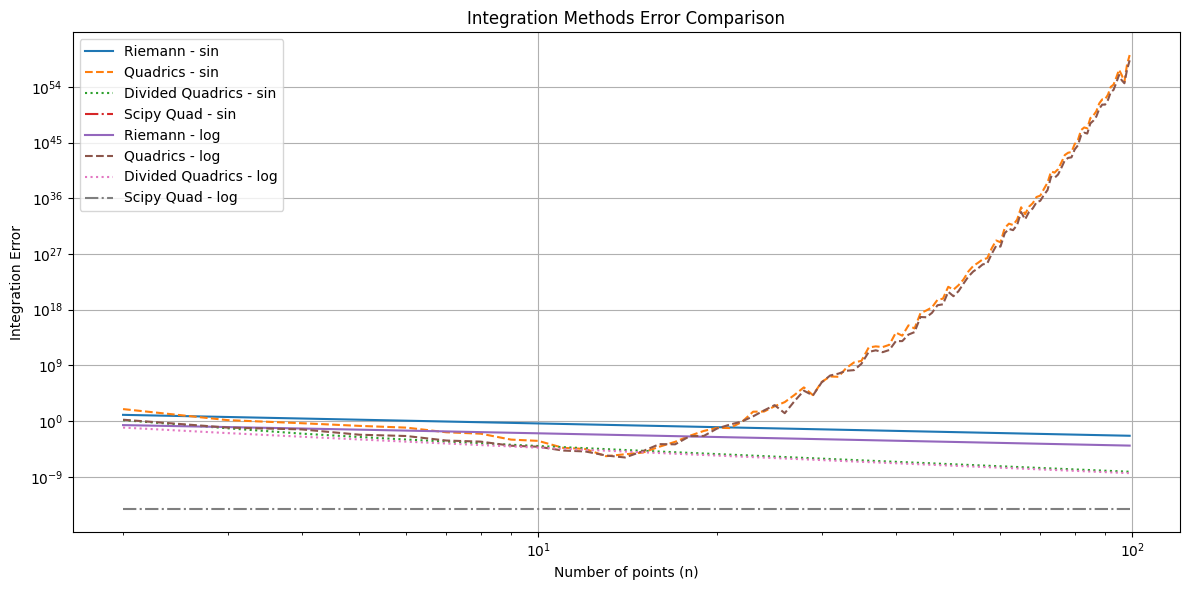

In [36]:
# Get test functions and their solutions
funcs = test_functions()
sols = solutions()

# Test parameters
ns = range(2, 100)
a, b = 2, 10

plt.figure(figsize=(12, 6))

# Test each function
for name, f in funcs.items():
    # Get exact value from solution
    exact_value = sols[name](b) - sols[name](a)
    
    # Get errors for all methods
    errors = test_integration_methods(f, ns, a, b, exact_value)
    
    # Calculate scipy.quad error
    quad_result, _ = quad(f, a, b)
    quad_error = abs(quad_result - exact_value)
    quad_errors = [quad_error] * len(ns)  # Create constant array for plotting
    
    # Plot errors for each method
    plt.plot(ns, errors['riemann'], '-', label=f'Riemann - {name}')
    plt.plot(ns, errors['quadrics'], '--', label=f'Quadrics - {name}')
    plt.plot(ns, errors['divided_quadrics'], ':', label=f'Divided Quadrics - {name}')
    plt.plot(ns, quad_errors, '-.', label=f'Scipy Quad - {name}')

plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.xlabel('Number of points (n)')
plt.ylabel('Integration Error')
plt.title('Integration Methods Error Comparison')
plt.legend()
plt.tight_layout()
plt.show()

points vs precision

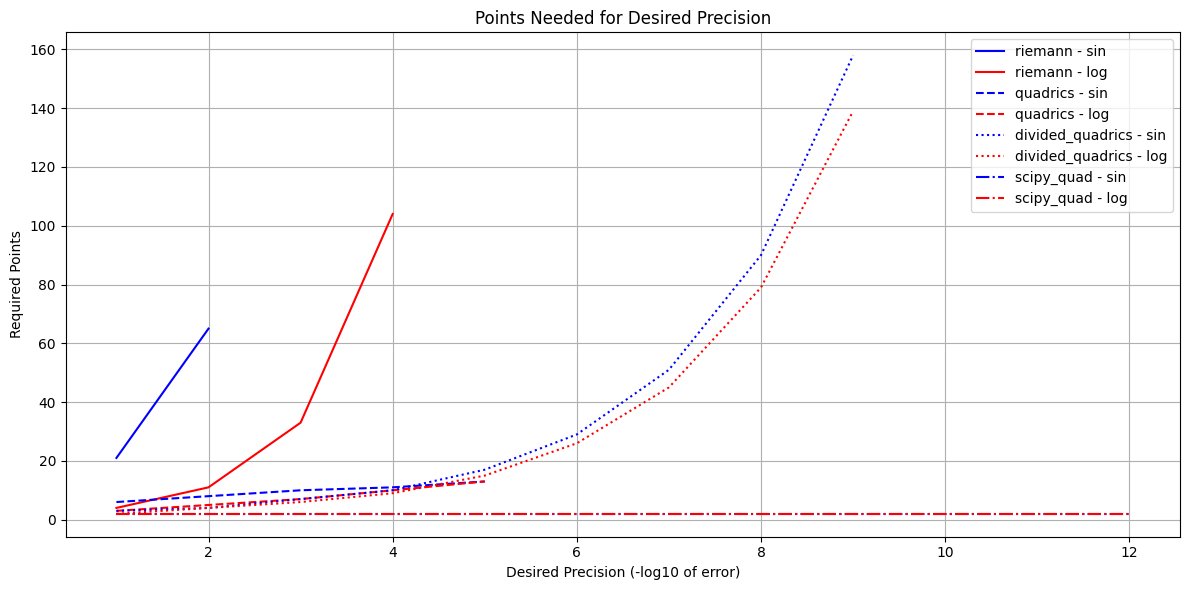

In [5]:
funcs = test_functions()
sols = solutions()
a = 2
b = 10

# Test parameters
error_thresholds = [10**(-i) for i in range(1, 13)]  # 10^-1 to 10^-12
max_n = 25 * (b-a)  # Maximum number of points to test

# Dictionary to store results for each method and function
results = {
    'riemann': {name: [] for name in funcs.keys()},
    'quadrics': {name: [] for name in funcs.keys()},
    'divided_quadrics': {name: [] for name in funcs.keys()},
    'scipy_quad': {name: [] for name in funcs.keys()}
}

# For each function
for name, f in funcs.items():
    exact_value = sols[name](b) - sols[name](a)
    
    # For each error threshold
    for threshold in error_thresholds:
        n = 2  # Start with minimum points
        found = {'riemann': False, 'quadrics': False, 'divided_quadrics': False, 'scipy_quad': False}
        
        while n <= max_n and not all(found.values()):
            # Test all methods
            errors = test_integration_methods(f, [n], a, b, exact_value)
            
            # Add scipy.quad integration
            quad_result, _ = quad(f, a, b)
            quad_error = abs(quad_result - exact_value)
            if not found['scipy_quad'] and quad_error < threshold:
                results['scipy_quad'][name].append((threshold, n))
                found['scipy_quad'] = True
            
            # Check each method
            for method in ['riemann', 'quadrics', 'divided_quadrics']:
                if not found[method] and errors[method][0] < threshold:
                    results[method][name].append((threshold, n))
                    found[method] = True
            
            n += 1
            
        # If method didn't converge, add None
        for method in results.keys():
            if not found[method]:
                results[method][name].append((threshold, None))

# Plotting
plt.figure(figsize=(12, 6))

colors = {'sin': 'blue', 'log': 'red'}
styles = {
    'riemann': '-', 
    'quadrics': '--', 
    'divided_quadrics': ':', 
    'scipy_quad': '-.'
}

for method in results.keys():
    for name in funcs.keys():
        points = [(t, n) for t, n in results[method][name] if n is not None]
        if points:
            thresholds, ns = zip(*points)
            plt.plot([(-np.log10(t)) for t in thresholds], ns, 
                    styles[method], 
                    color=colors[name],
                    label=f'{method} - {name}')

plt.grid(True)
plt.xlabel('Desired Precision (-log10 of error)')
plt.ylabel('Required Points')
plt.title('Points Needed for Desired Precision')
plt.legend()
plt.tight_layout()
plt.show()

best function

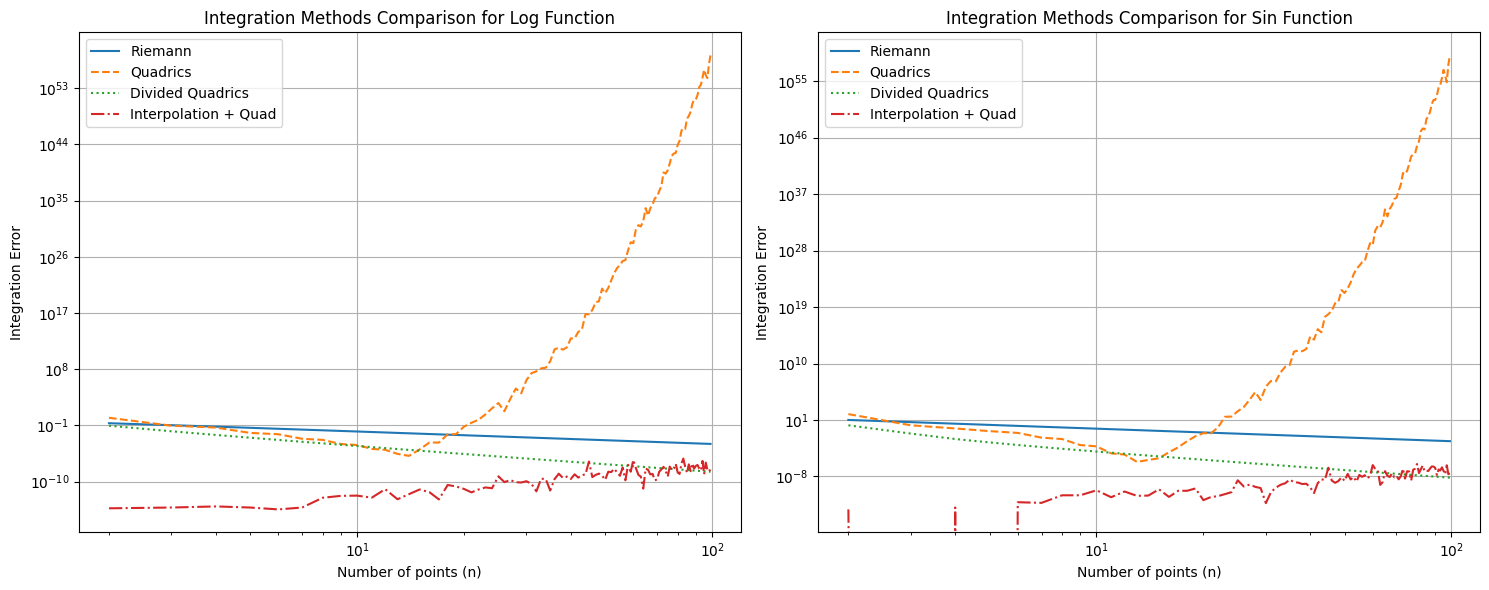

In [40]:
# Get test functions and their solutions
funcs = test_functions()
sols = solutions()

# Test parameters
ns = range(2, 100)
a, b = 2, 10

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Test both functions
for name, ax in zip(['log', 'sin'], [ax1, ax2]):
    f = funcs[name]
    exact_value = sols[name](b) - sols[name](a)
    
    # Get errors for direct integration methods
    errors = test_integration_methods(f, ns, a, b, exact_value)
    
    # Calculate errors for interpolated function integration
    interp_errors = []
    for n in ns:
        # Get interpolation using our method
        h = apoximation_in_unitary_space(f, n, a, b)
        
        # Integrate interpolated function using scipy.quad
        interp_result, _ = quad(h, a, b)
        interp_error = abs(interp_result - exact_value)
        interp_errors.append(interp_error)
    
    # Plot errors for each method
    ax.plot(ns, errors['riemann'], '-', label='Riemann')
    ax.plot(ns, errors['quadrics'], '--', label='Quadrics')
    ax.plot(ns, errors['divided_quadrics'], ':', label='Divided Quadrics')
    ax.plot(ns, interp_errors, '-.', label='Interpolation + Quad')
    
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.grid(True)
    ax.set_xlabel('Number of points (n)')
    ax.set_ylabel('Integration Error')
    ax.set_title(f'Integration Methods Comparison for {name.capitalize()} Function')
    ax.legend()

plt.tight_layout()
plt.show()